In [13]:
%pylab inline
from functools import partial

import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


# Part 1

## 1.1 Linear Regression

###   1.

In [158]:
# Independent variable
x = [1, 2, 3, 4]

# Number of samples
m = len(x)

# Number of features
n = 1

# Build feature matrix
X = np.array(x)
X.shape = (m, n)

# Observations
y_train = np.array([3, 2, 0, 5])
y_train.shape = (1, m)

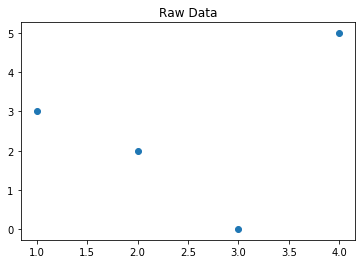

In [159]:
title("Raw Data")
scatter(X, y_train)
show()

In [160]:
def polynomial_feature_map(X, k=2):
    """
    Number of features, n = 1.
    """
    m, n = X.shape
    
    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k):
            mapped_feature[j] = x**j
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)

In [224]:
def linear_regression(Phi, y_train):
    """
    Apply normal equations to find weights
    """

    a = np.matrix(np.matmul(Phi.T, Phi))
    b = np.matrix(np.matmul((Phi.T), y_train.T))

    w = np.matmul(a.I, b)
    
    return w

In [162]:
def polynomial(x, k, *w):
    """
    Apply polynomial weights derived from normal equations.
    """
    result = np.zeros_like(x)
    for i, sample in enumerate(x):
        res = 0
        for j in range(k):
            res += w[j]*sample**j
        result[i] = res

    return result

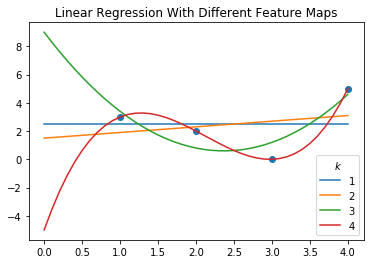

In [163]:
# Plot raw data points
scatter(X, y_train)

# Test data
x_test = np.arange(0, 4.1, 0.1)

# Plot each model
for i in range(1, 5):
    Phi = polynomial_feature_map(X, k=i)
    w = linear_regression(Phi, y_train)
    plot(x_test, polynomial(x_test, len(w), *w), label=i)
    
title('Linear Regression With Different Feature Maps')
legend(title='$k$')

In [164]:
# Weights for k=1 to k=3

for k in range(1, 4):
    Phi = polynomial_feature_map(X, k)
    w = linear_regression(Phi, y_train)
    print(f"k={k}")
    print("**********")
    print(w)

k=1
**********
[[2.5]]
k=2
**********
[[1.5]
 [0.4]]
k=3
**********
[[ 9. ]
 [-7.1]
 [ 1.5]]


In [422]:
def sse(y, y_hat):        
    return sum((y-y_hat)**2)

def mse(y, y_hat):
    return sse(y, y_hat)/len(y_hat)

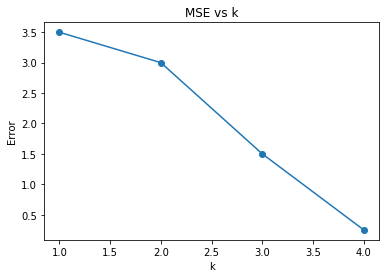

In [166]:
error_vec = []

for i in range(1, 5):
    Phi = polynomial_feature_map(X, k=i)
    w = linear_regression(Phi, y_train)
    error_vec.append(mse(y_train, polynomial(x, len(w), *w)))

title("MSE vs k")
plot(range(1, 5), error_vec, '-o')
xlabel('k')
ylabel('Error')
show()

###   2.

In [167]:
def g_sigma(x, sigma):
    epsilon = np.random.normal(scale=sigma, size=x.size)
    return np.sin(2*np.pi*x)**2 + epsilon

def exact(x):
    return np.sin(2*np.pi*x)**2

In [168]:
x_sample_30 = np.random.random(size=30)
x = np.arange(0, 1, 0.01)
g_sigma_noise = partial(g_sigma, sigma=0.07)
y_sample_30 = g_sigma_noise(x_sample_30)

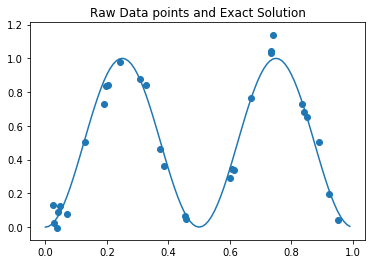

In [169]:
title("Raw Data points and Exact Solution")
scatter(x_sample_30, y_sample_30)
plot(x, exact(x))
show()

In [170]:
m = len(x_sample_30)
n = 1

X_train = np.array(x_sample_30)
X_train.shape = (m, n)
y_train = y_sample_30
y_train.shape = (1, m)

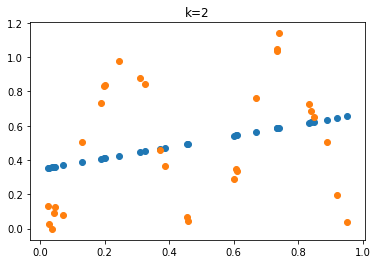

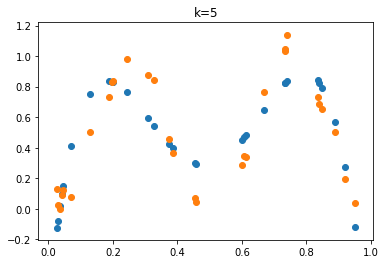

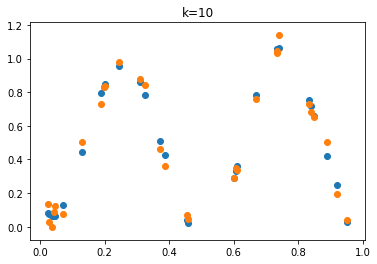

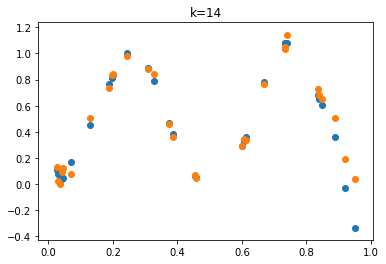

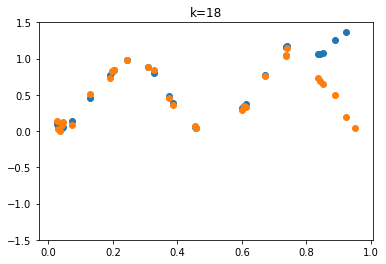

In [171]:
k_vector = [2, 5, 10, 14, 18]

for k in k_vector:
    figure()
    title(f'k={k}')
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    scatter(x_sample_30, polynomial(x_sample_30, len(w), *w), label=k)
    scatter(x_sample_30, y_sample_30)
ylim((-1.5, 1.5))
show()

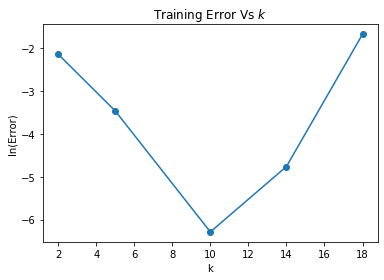

In [172]:
m = len(x_sample_30)
n = 1

X_train = np.array(x_sample_30)
X_train.shape = (m, n)
y_train = y_sample_30
y_train.shape = (1, m)

training_error_vec = []
k_vector = [2, 5, 10, 14, 18]
for k in k_vector:
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    error = mse(y_sample_30, polynomial(x_sample_30, len(w), *w))
    training_error_vec.append(np.log(error))

title("Training Error Vs $k$")
plot(k_vector, training_error_vec, '-o')
xlabel('k')
ylabel('ln(Error)')
show()

The increasing error with K is due to the ill-conditioned matrix for large K values

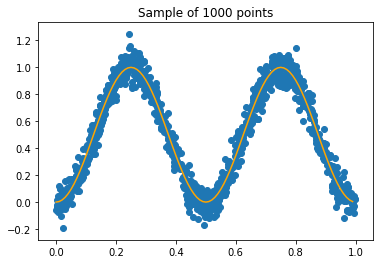

In [173]:
x_sample_1000 = np.random.random(size=1000)
g_partial = partial(g_sigma, sigma=0.07)
y_sample_1000 = g_partial(x_sample_1000)

scatter(x_sample_1000, y_sample_1000)

x = np.arange(0, 1, 0.01)
y = np.sin(2*np.pi*x)**2

plot(x, y, color='orange')
title("Sample of 1000 points")
show()

In [174]:
m = len(x_sample_1000)
n = 1

X_test = np.array(x_sample_1000)
X_test.shape = (m, n)
y_test = y_sample_1000
y_test.shape = (1, m)

In [175]:
test_error_vec = []
k_vector = arange(2,18,1)

for k in k_vector:
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    error = mse(y_test, polynomial(x_sample_1000, len(w), *w))
    test_error_vec.append(np.log(error))

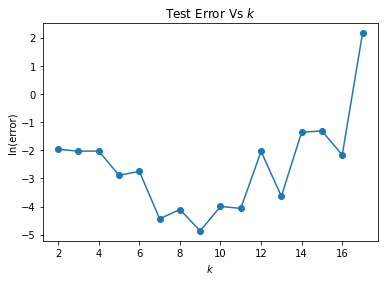

In [176]:
title("Test Error Vs $k$")
plot(k_vector, test_error_vec, '-o')
ylabel("ln(error)")
xlabel("$k$")
show()

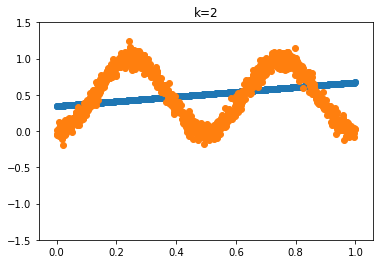

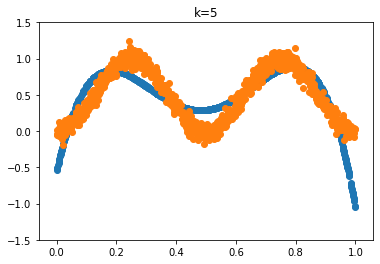

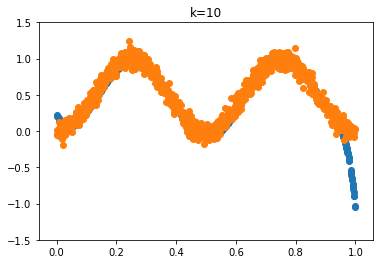

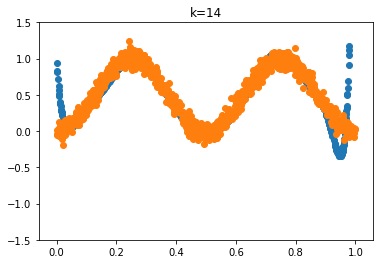

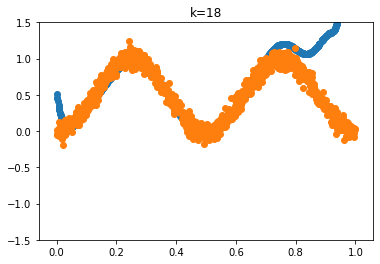

In [177]:
k_vector = [2, 5, 10, 14, 18]

for k in k_vector:
    figure()
    title(f'k={k}')
    Phi = polynomial_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)

    scatter(x_sample_1000, polynomial(x_sample_1000, len(w), *w), label=k)
    scatter(x_sample_1000, y_sample_1000)

    ylim((-1.5, 1.5))
show()

In [178]:
def error_experiment(feature_map, basis, x_sample, y_sample, k_vector):
    m = len(x_sample)
    n = 1

    X = np.array(x_sample)
    X.shape = (m, n)
    y = y_sample
    y.shape = (1, m)

    error_vec = []
    for k in k_vector:
        Phi = feature_map(X, k)
        w = linear_regression(Phi, y)
        error = mse(y_sample, basis(x_sample, len(w), *w))
        error_vec.append(error)
    
    return error_vec

def runner(feature_map, basis, x_sample, k_vector, nruns=5):
    """
    Function runner
    """
    
    results = []
    for i in range(nruns):
        y_sample = g_sigma_noise(x_sample)
        results.append(error_experiment(feature_map, basis, x_sample, y_sample, k_vector))
    return np.array(results)


In [179]:
train_results = runner(polynomial_feature_map, polynomial, x_sample_30, [2, 5, 10, 14, 18])

Text(0, 0.5, 'Mean of ln(error)')

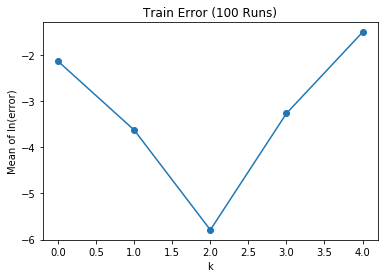

In [182]:
title("Train Error (100 Runs)")
plot(np.log(train_results.mean(axis=0)), '-o')
xlabel('k')
ylabel('Mean of ln(error)')

In [183]:
test_results = runner(polynomial_feature_map, polynomial, x_sample_1000, arange(2, 18, 1))

Text(0, 0.5, 'Mean of ln(error)')

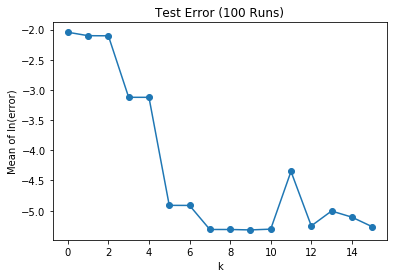

In [184]:
title("Test Error (100 Runs)")
plot(np.log(test_results.mean(axis=0)), '-o')
xlabel('k')
ylabel('Mean of ln(error)')

### 3.

In [185]:
def sinusoidal_feature_map(X, k=2):
    """
    Number of features, n = 1.
    """
    m, n = X.shape
    
    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k):
            mapped_feature[j] = np.sin((j+1)*np.pi*x)
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)

In [186]:
def sinusoidal(x, k, *w):
    """
    Apply sinusoidal weights derived from normal equations.
    """
    result = np.zeros_like(x)
    for i, sample in enumerate(x):
        res = 0
        for j in range(k):
            res += w[j]*np.sin((j+1)*np.pi*sample)
        result[i] = res

    return result

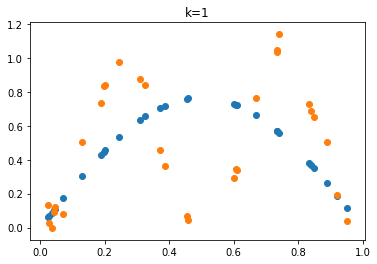

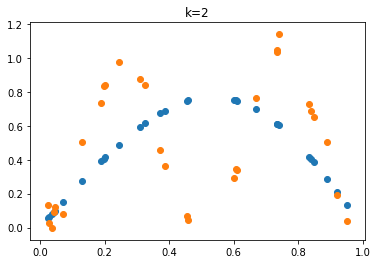

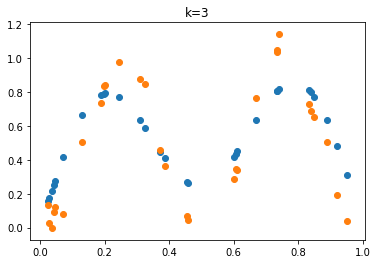

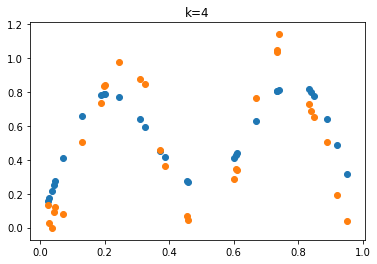

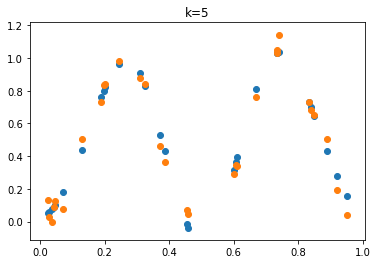

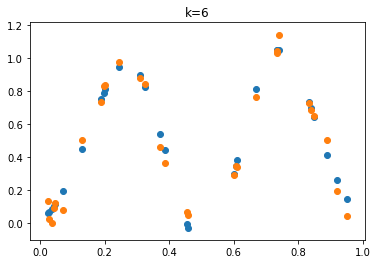

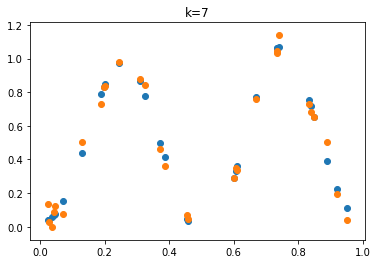

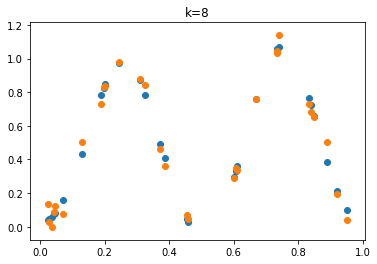

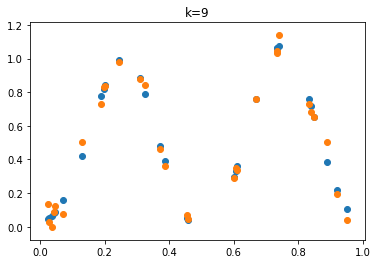

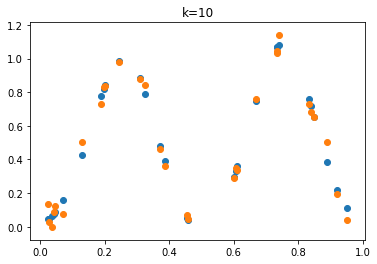

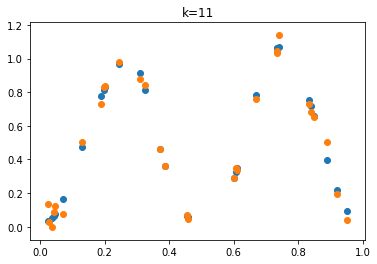

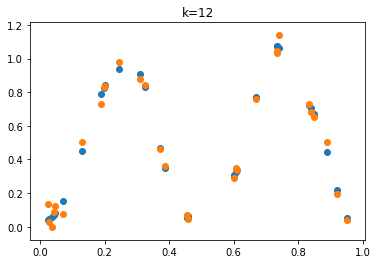

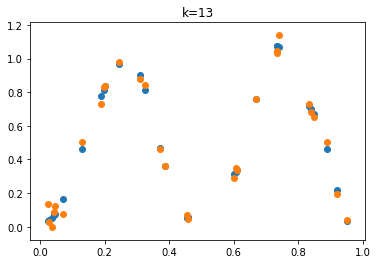

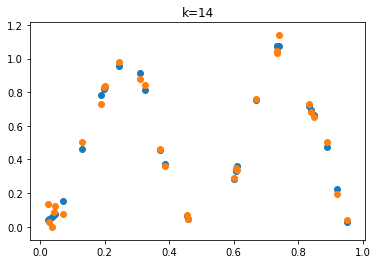

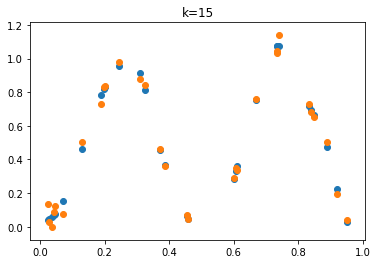

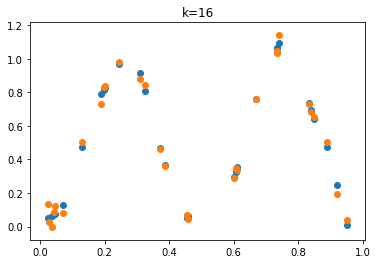

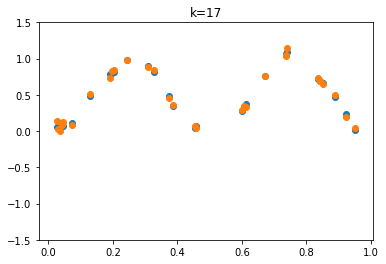

In [187]:
k_vector = arange(1, 18, 1)

for k in k_vector:
    figure()
    title(f'k={k}')
    Phi = sinusoidal_feature_map(X_train, k)
    w = linear_regression(Phi, y_train)
    scatter(x_sample_30, sinusoidal(x_sample_30, len(w), *w), label=k)
    scatter(x_sample_30, y_sample_30)
ylim((-1.5, 1.5))
show()

In [188]:
train_results = runner(sinusoidal_feature_map, sinusoidal, x_sample_30, [2, 5, 10, 14, 18])

Text(0, 0.5, 'Mean of ln(error)')

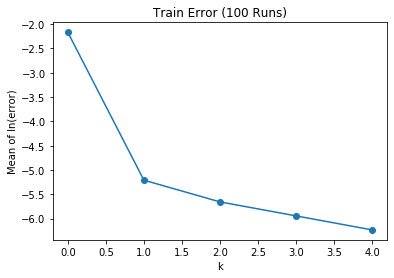

In [189]:
title("Train Error (100 Runs)")
plot(np.log(train_results.mean(axis=0)), '-o')
xlabel('k')
ylabel('Mean of ln(error)')

In [190]:
test_results = runner(sinusoidal_feature_map, sinusoidal, x_sample_1000, arange(2, 18, 1))

Text(0, 0.5, 'Mean of ln(error)')

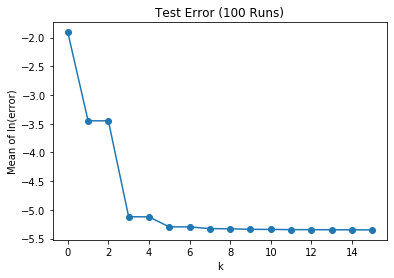

In [191]:
title("Test Error (100 Runs)")
plot(np.log(test_results.mean(axis=0)), '-o')
xlabel('k')
ylabel('Mean of ln(error)')

 ## 1.2 Boston housing and kernels

In [192]:
boston_dataset = sio.loadmat('boston.mat')

In [193]:
X, y = boston_dataset['boston'][:,:-1], boston_dataset['boston'][:, -1: ]

#### Train test split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 4.a Fitting with a constant function

Intuitively just finding the mean of the dataset.

In [216]:
training_ones = np.ones_like(y_train)
test_ones = np.ones_like(y_test)

In [217]:
training_ones.shape

(339, 1)

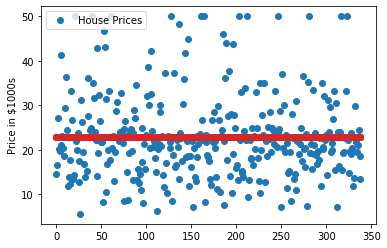

In [242]:
w = linear_regression(training_ones, y_train.T)
plot(y_train, 'o', label='House Prices')
plot(polynomial(X_train, len(w), *w), 'o')
legend()
ylabel('Price in $1000s')
show()

In [238]:
mse_train = mse(y_train, polynomial(X_train, len(w), *w))
mse_test = mse(y_test, polynomial(X_test, len(w), *w))

In [241]:
print(f"MSE on the training data is {mse_train}")
print(f"MSE on the test data is {mse_test}")

MSE on the training data is 1145.8767890985982
MSE on the test data is 1006.7155801452152


In [244]:
np.matmul(X.T,X).shape

(13, 13)

#### b.

This is like finding the mean of the dependent variable data, or just the bias term.

#### c.

In [266]:
def identity_feature_map(X, k=None):
    """
    Identity feature map, add a bias term.
    """

    
    m, n = X.shape
    k = n + 1

    phi = np.zeros(shape=(m, k))
    
    for i, x in enumerate(X):
        mapped_feature = np.zeros(shape=(k))
        for j in range(k-1):
            mapped_feature[j] = x[j]
        
        # Add extra bias feature
        mapped_feature[-1] = 1
        
        phi[i] = mapped_feature
    
    return np.matrix(phi)
    

In [518]:
# pick out nth feature
n = 1

# Reshape, and use identity feature map to add bias term
feature_n = X_train[:,n].reshape(len(X_train), 1)
mapped_feature_n = identity_feature_map(feature_n)

In [519]:
w = linear_regression(mapped_feature_n, y_train.T)

In [520]:
def identity_predictor(x, w):
    return np.dot(x, w)

In [521]:
mapped_feature_n_test = identity_feature_map(X_test[:,n].reshape(len(X_test), 1))

In [522]:
predictions = [float(identity_predictor(feat, w)) for feat in mapped_feature_n_test]

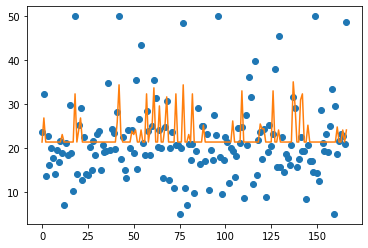

In [523]:
plot(y_test, 'o', label='House Prices')
plot(predictions)
show()


In [524]:
mean_square_error =  mse(y_train, predictions)
print(f"MSE with feature {n} {mean_square_error}")

MSE with feature 1 33551.06039533493


In [525]:
w_all_attributes = linear_regression(identity_feature_map(X_train), y_train.T)

In [526]:
predictions_all_attributes = [float(identity_predictor(feat, w_all_attributes)) for feat in identity_feature_map(X_test)]



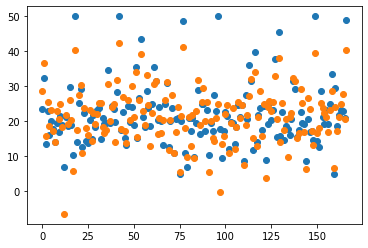

In [527]:
plot(y_test, 'o', label='House Prices')

plot(predictions_all_attributes, 'o')

In [528]:
mean_square_error =  mse(y_test, np.array(predictions_all_attributes))
print(f"MSE with feature all attributes {mean_square_error}")

MSE with feature all attributes 23163.225665984588
